In [1]:
import datetime
import math
import os
import numpy as np
import pandas as pd

import matplotlib.dates as mdates
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(rc={'figure.figsize':(11, 4)})

#https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

In [2]:
def plot_measures(values,labels,titulo, x_rotation, fig_size=(8,8)):
        
    ind = np.arange(len(labels))  # the x locations for the groups
    width = 0.45  # the width of the bars

    fig, ax = plt.subplots(figsize=fig_size)
    rects1 = ax.bar(ind, values, width,color='SkyBlue')
    
    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Conteos')
    ax.set_title(titulo)
    ax.set_xticks(ind)
    ax.set_xticklabels(labels,rotation = x_rotation)
    
    autolabel(rects1,ax, "center")
    plt.show()
    
def autolabel(rects, ax,xpos='center'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                height, ha=ha[xpos], va='bottom')    

In [3]:
dataset_dir = os.path.join('..','..','dataset','Series','Generacion')

data_list = list()
for root, dirs, files in os.walk(dataset_dir, topdown=False):
    for file in files:
        f = pd.read_excel(os.path.join(root,file))
        data_list.append(f)
        print(os.path.join(root,file),f.shape)
            
dataset = pd.concat(data_list)

..\..\dataset\Series\Generacion\0_0.xlsx (13608, 10)
..\..\dataset\Series\Generacion\COGENERADOR_0.xlsx (741672, 10)
..\..\dataset\Series\Generacion\COGENERADOR_1.xlsx (741672, 10)
..\..\dataset\Series\Generacion\EOLICA_0.xlsx (130080, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_0.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_1.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_10.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_11.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_12.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_13.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_14.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_2.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_3.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_4.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_5.xlsx (1044040, 10)
..\..\dataset\Series\Generacion\HIDRAULICA_6.xlsx (

In [4]:
dataset.shape

(20380464, 10)

In [5]:
dataset.columns

Index(['Fecha', 'Recurso', 'Tipo Generación', 'Combustible', 'Código Agente',
       'Tipo Despacho', 'Es Menor', 'Es Autogenerador', 'Version', 'kWh'],
      dtype='object')

# Recursos

In [6]:
recursos_unicos = pd.unique(dataset['Recurso'])

In [7]:
'Cantidad de Recursos Unicos: {}'.format(len(recursos_unicos))

'Cantidad de Recursos Unicos: 258'

In [9]:
recursos_unicos_conteo = dataset.groupby('Recurso')['Fecha'].count()/24
recursos_unicos_conteo = recursos_unicos_conteo.sort_values(ascending=False)

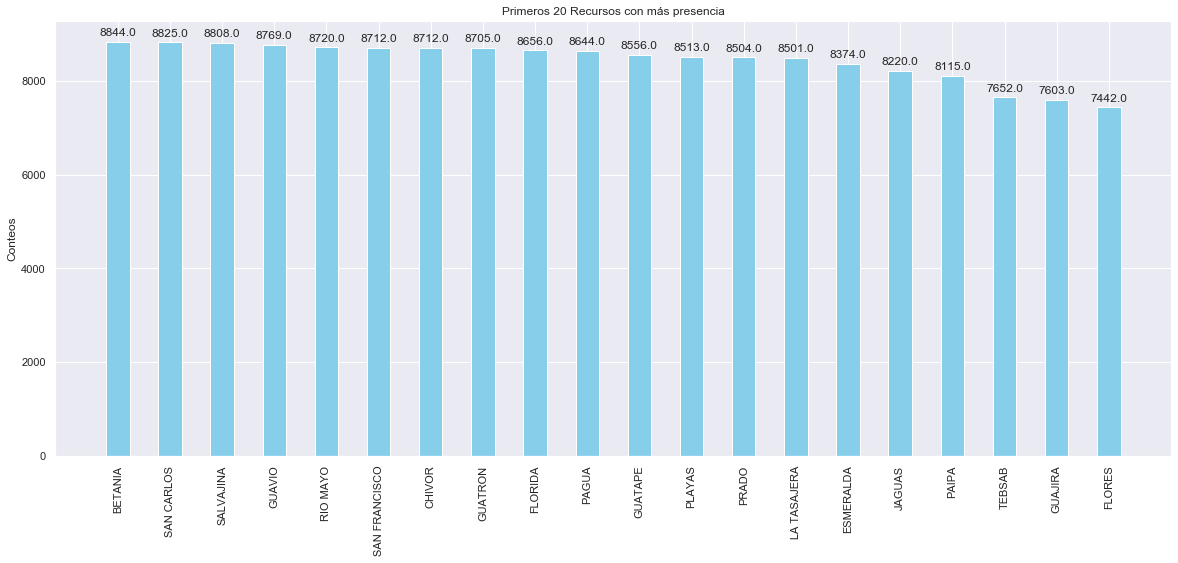

In [10]:
recursos_unicos_primeros = recursos_unicos_conteo[:20]
values = recursos_unicos_primeros.values
labels = recursos_unicos_primeros.index
plot_measures(values,labels,'Primeros 20 Recursos con más presencia',x_rotation=90,fig_size=(20,8))

# Tipos de Generación

In [12]:
datos_agrupados_copy = dataset.copy()

In [13]:
tipos_generacion_unicos = pd.unique(datos_agrupados_copy['Tipo Generación'])

In [14]:
'Cantidad de Tipos de Generación Unicos: {}'.format(len(tipos_generacion_unicos))

'Cantidad de Tipos de Generación Unicos: 6'

In [17]:
tipos_generacion_unicos_conteo = datos_agrupados_copy.groupby('Tipo Generación')['Fecha'].count()/24
tipos_generacion_unicos_conteo = tipos_generacion_unicos_conteo.sort_values(ascending=False)

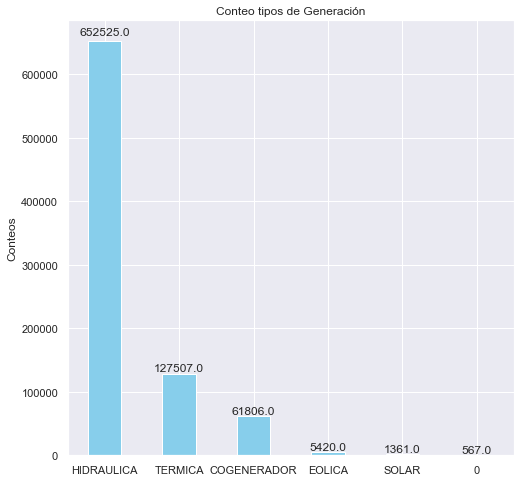

In [18]:
values = tipos_generacion_unicos_conteo.values
labels = tipos_generacion_unicos_conteo.index
plot_measures(values,labels,'Conteo tipos de Generación',x_rotation=0)

# Combustible

In [19]:
datos_agrupados_copy = dataset.copy()

In [20]:
combustible_unicos = pd.unique(datos_agrupados_copy['Combustible'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(combustible_unicos))

'Cantidad de Tipos de despacho Unicos: 15'

In [21]:
combustible_unicos_conteo = datos_agrupados_copy.groupby('Combustible')['Fecha'].count()/24
combustible_unicos_conteo = combustible_unicos_conteo.sort_values(ascending=False)

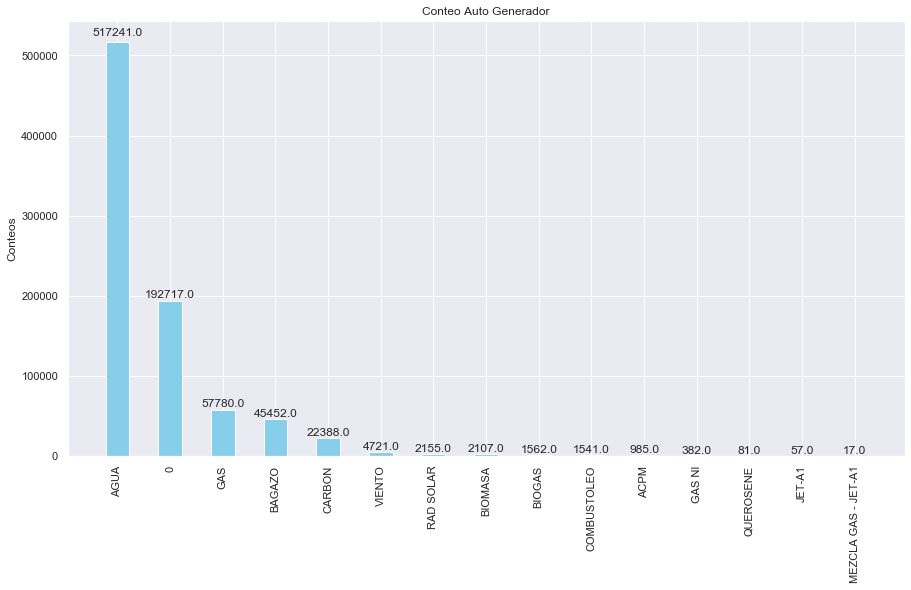

In [22]:
values = combustible_unicos_conteo.values
labels = combustible_unicos_conteo.index
plot_measures(values,labels,'Conteo Auto Generador',x_rotation=90,fig_size=(15,8))

# Tipo Despacho

In [23]:
datos_agrupados_copy = dataset.copy()

In [24]:
tipo_despacho_unicos = pd.unique(datos_agrupados_copy['Tipo Despacho'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(tipo_despacho_unicos))

'Cantidad de Tipos de despacho Unicos: 6'

In [25]:
tipos_despacho_unicos_conteo = datos_agrupados_copy.groupby('Tipo Despacho')['Fecha'].count()/24
tipos_despacho_unicos_conteo = tipos_despacho_unicos_conteo.sort_values(ascending=False)

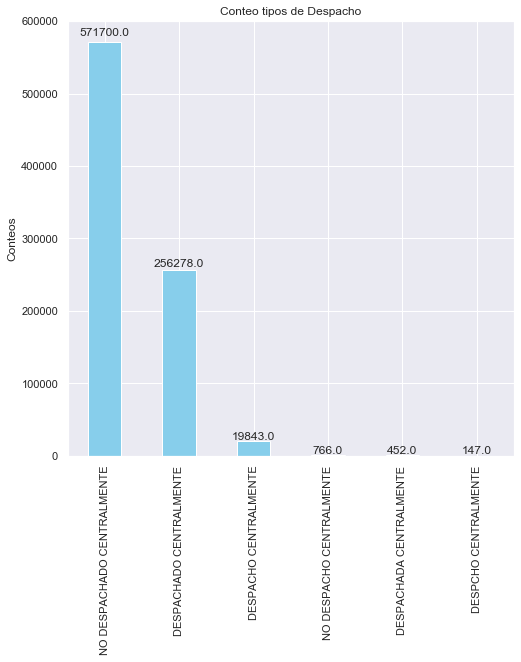

In [26]:
values = tipos_despacho_unicos_conteo.values
labels = tipos_despacho_unicos_conteo.index
plot_measures(values,labels,'Conteo tipos de Despacho',x_rotation=90)

# Auto Generador

In [27]:
datos_agrupados_copy = dataset.copy()

In [28]:
autogenerador_unicos = pd.unique(datos_agrupados_copy['Es Autogenerador'])
'Cantidad de Tipos de despacho Unicos: {}'.format(len(autogenerador_unicos))

'Cantidad de Tipos de despacho Unicos: 3'

In [29]:
autogenerador_unicos_conteo = datos_agrupados_copy.groupby('Es Autogenerador')['Fecha'].count()/24
autogenerador_unicos_conteo = autogenerador_unicos_conteo.sort_values(ascending=False)

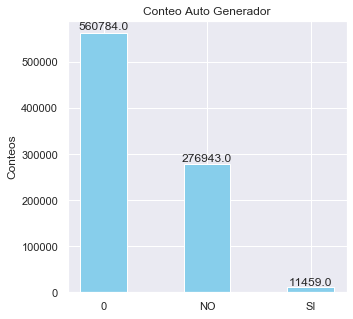

In [30]:
values = autogenerador_unicos_conteo.values
labels = autogenerador_unicos_conteo.index
plot_measures(values,labels,'Conteo Auto Generador',x_rotation=0,fig_size=(5,5))

# Visualización de los datos

In [31]:
def obtener_datos_por_recurso(data,nombre_recurso):
    
    datos_recurso = data[data['Recurso'] == nombre_recurso]
    datos_recurso = datos_recurso.copy()

    datos_recurso = datos_recurso.set_index('Fecha')
    
    datos_recurso['Año'] = datos_recurso.index.year
    datos_recurso['Mes'] = datos_recurso.index.month
    datos_recurso['Dia'] = datos_recurso.index.day_name()
    
    return datos_recurso

In [32]:
def grafico_comportamiento(datos):
    cols_plot = ['kWh']
    nombre_graficas = ['kWh']
    axes = datos[cols_plot].plot(alpha=0.8, linestyle='-', figsize=(15, 5), subplots=True)
    for ax,name in zip(axes,nombre_graficas):
        ax.set_ylabel(name)

In [33]:
def grafico_comportamiento_por_mes(datos):
    fig, ax = plt.subplots(1, 1, figsize=(15, 5), sharex=True)
    
    sns.boxplot(data=datos, x='Mes', y='kWh', ax=ax)
    ax.set_title('kWh')

In [34]:
def grafico_filtrado_fecha(datos,fecha_min,fecha_max):
    ax = datos.loc[fecha_min:fecha_max, 'kWh'].plot(marker='o',linestyle='-',figsize=(15, 5))
    ax.set_ylabel('kWh');

In [35]:
def grafico_resampling_rolling_window(datos,fecha_min,fecha_max):
    cols_plot = ['kWh']
    datos_7d = datos[cols_plot].rolling(7, center=True).mean()

    fig, ax = plt.subplots(figsize=(15, 5))

    ax.plot(datos.loc[fecha_min:fecha_max, 'kWh'],
    marker='.', linestyle='-', linewidth=0.5, label='Diaria')

    ax.plot(datos_7d.loc[fecha_min:fecha_max, 'kWh'],linestyle='-', label='Media Movil 7-Días')

    ax.set_ylabel('kWh')
    ax.legend();

In [36]:
dataset.columns

Index(['Fecha', 'Recurso', 'Tipo Generación', 'Combustible', 'Código Agente',
       'Tipo Despacho', 'Es Menor', 'Es Autogenerador', 'Version', 'kWh'],
      dtype='object')

In [37]:
df_hidraulica = dataset[dataset['Tipo Generación']=='HIDRAULICA']

In [38]:
recurso = obtener_datos_por_recurso(df_hidraulica,nombre_recurso='TEQUENDAMA')

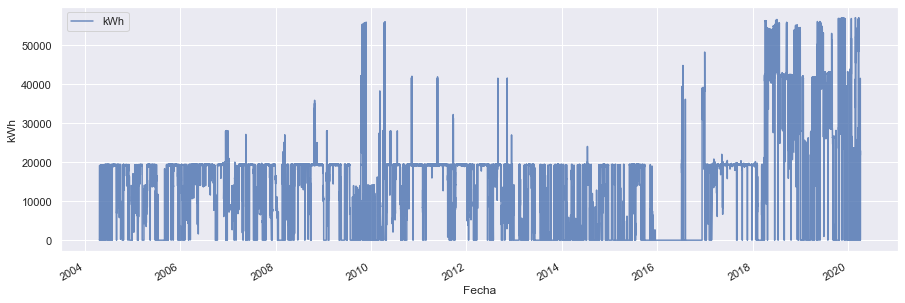

In [39]:
grafico_comportamiento(recurso)

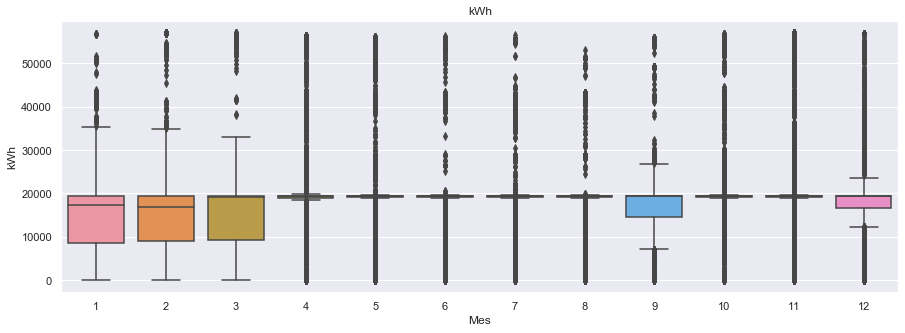

In [40]:
grafico_comportamiento_por_mes(recurso)

In [41]:
'Fecha Mínima {} - Fecha Máxima {}'.format(recurso.index.min(),recurso.index.max())

'Fecha Mínima 2004-04-22 00:00:00 - Fecha Máxima 2020-04-04 23:00:00'

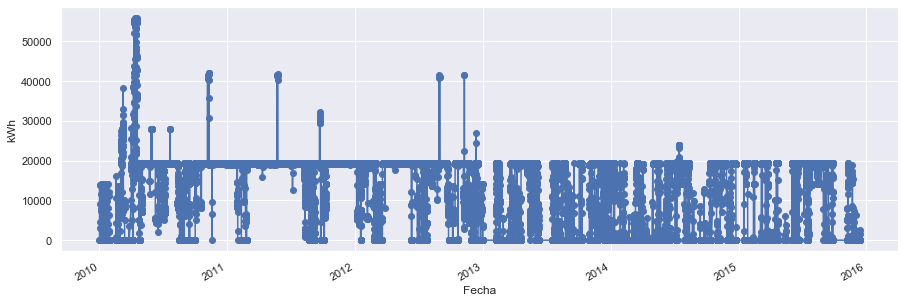

In [42]:
grafico_filtrado_fecha(datos=recurso,fecha_min='2010-01',fecha_max='2015-12')

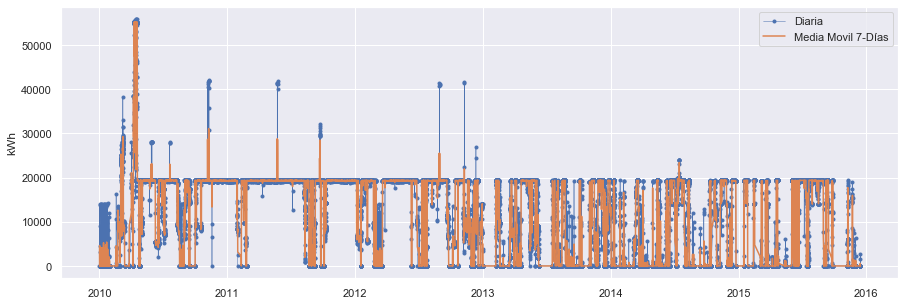

In [43]:
grafico_resampling_rolling_window(datos=recurso,fecha_min='2010-01',fecha_max='2015-12')